<a href="https://colab.research.google.com/github/yechan9601/python_digital_marketing/blob/main/ch9_21801073.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 1. Load Data

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Online Retail.xlsx')

In [ ]:
df.shape

(541909, 8)

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# 2. Data Clean-Up

#### - Negative Quantity

In [ ]:
df.loc[df['Quantity'] <= 0].shape

(10624, 8)

In [ ]:
df.shape

(541909, 8)

In [ ]:
df = df.loc[df['Quantity'] > 0]

In [ ]:
df.shape

(531285, 8)

In [ ]:
df.shape[0]

531285

#### - Missing CustomerID

In [ ]:
pd.isnull(df['CustomerID']).sum()

133361

In [ ]:
df.shape

(531285, 8)

In [ ]:
df = df[pd.notnull(df['CustomerID'])]

In [ ]:
df.shape

(397924, 8)

In [ ]:
531285 - 133361

397924

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


#### - Excluding Incomplete Month

In [ ]:
print('Date Range: %s ~ %s' % (df['InvoiceDate'].min(),  df['InvoiceDate'].max()))

Date Range: 2010-12-01 08:26:00 ~ 2011-12-09 12:50:00


In [ ]:
# 2011년 12월 1일 이후의 데이터
df.loc[df['InvoiceDate'] >= '2011-12-01'].shape

(17304, 8)

In [ ]:
df.shape

(397924, 8)

In [ ]:
# 12월 1일 이후의 데이터는 얼마 되지 않으므로 데이터프레임에서 제거
df = df.loc[df['InvoiceDate'] < '2011-12-01']

In [ ]:
df.shape

(380620, 8)

#### - Total Sales

In [ ]:
df['Sales'] = df['Quantity'] * df['UnitPrice']

<ipython-input-22-b3761472ad58>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sales'] = df['Quantity'] * df['UnitPrice']


In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


#### - Per Order Data

In [ ]:
# CustomerID와 InvoiceNo에 따른 그룹별로 나누어 매출에 대한 집계함수 sum과 주문날짜에 대한 집계함수 max를 데이터프레임에 저장
orders_df = df.groupby(['CustomerID', 'InvoiceNo']).agg({
    'Sales' : sum,
    'InvoiceDate' : max # 제일 최근 날짜
})

In [ ]:
orders_df.head(10)

Sales         InvoiceDate
CustomerID InvoiceNo                              
12346.0    541431     77183.60 2011-01-18 10:01:00
12347.0    537626       711.79 2010-12-07 14:57:00
           542237       475.39 2011-01-26 14:30:00
           549222       636.25 2011-04-07 10:43:00
           556201       382.52 2011-06-09 13:01:00
           562032       584.91 2011-08-02 08:48:00
           573511      1294.32 2011-10-31 12:25:00
12348.0    539318       892.80 2010-12-16 19:09:00
           541998       227.44 2011-01-25 10:42:00
           548955       367.00 2011-04-05 10:47:00

# 3. Data Analysis

In [ ]:
# groupby().agg()를 사용하기 위해 사용자정의 함수 선언
def groupby_mean(x):
  return x.mean()

def groupby_count(x):
  return x.count()

def purchase_duration(x):
  return (x.max() - x.min()).days

def avg_frequency(x):
  return (x.max() - x.min()).days / x.count()

groupby_mean.__name__ = 'avg'
groupby_count.__name__ = 'count'
purchase_duration.__name__ = 'purchase_duration'
avg_frequency.__name__ = 'purchase_frequency'

In [ ]:
summary_df = orders_df.reset_index().groupby('CustomerID').agg({
    'Sales': [min, max, sum, groupby_mean, groupby_count],
    'InvoiceDate': [min, max, purchase_duration, avg_frequency]
})

In [ ]:
summary_df

Sales                                          \
                 min       max       sum           avg count   
CustomerID                                                     
12346.0     77183.60  77183.60  77183.60  77183.600000     1   
12347.0       382.52   1294.32   4085.18    680.863333     6   
12348.0       227.44    892.80   1797.24    449.310000     4   
12349.0      1757.55   1757.55   1757.55   1757.550000     1   
12350.0       334.40    334.40    334.40    334.400000     1   
...              ...       ...       ...           ...   ...   
18280.0       180.60    180.60    180.60    180.600000     1   
18281.0        80.82     80.82     80.82     80.820000     1   
18282.0       100.21    100.21    100.21    100.210000     1   
18283.0         1.95    313.65   1886.88    125.792000    15   
18287.0        70.68   1001.32   1837.28    612.426667     3   

                   InvoiceDate                                        \
                           min                 max purchase_duration   
CustomerID                                                             
12346.0    2011-01-18 10:01:00 2011-01-18 10:01:00                 0   
12347.0    2010-12-07 14:57:00 2011-10-31 12:25:00               327   
12348.0    2010-12-16 19:09:00 2011-09-25 13:13:00               282   
12349.0    2011-11-21 09:51:00 2011-11-21 09:51:00                 0   
12350.0    2011-02-02 16:01:00 2011-02-02 16:01:00                 0   
...                        ...                 ...               ...   
18280.0    2011-03-07 09:52:00 2011-03-07 09:52:00                 0   
18281.0    2011-06-12 10:53:00 2011-06-12 10:53:00                 0   
18282.0    2011-08-05 13:35:00 2011-08-05 13:35:00                 0   
18283.0    2011-01-06 14:14:00 2011-11-30 12:59:00               327   
18287.0    2011-05-22 10:39:00 2011-10-28 09:29:00               158   

                               
           purchase_frequency  
CustomerID                     
12346.0              0.000000  
12347.0             54.500000  
12348.0             70.500000  
12349.0              0.000000  
12350.0              0.000000  
...                       ...  
18280.0              0.000000  
18281.0              0.000000  
18282.0              0.000000  
18283.0             21.800000  
18287.0             52.666667  

[4298 rows x 9 columns]

In [ ]:
# column 명을 하위 column명과 합치기
summary_df.columns = ['_'.join(col).lower() for col in summary_df.columns]

**<python 문자열 합치기>**

'구분자'.join(리스트)

In [ ]:
summary_df

,sales_min,sales_max,sales_sum,sales_avg,sales_count,invoicedate_min,invoicedate_max,invoicedate_purchase_duration,invoicedate_purchase_frequency
CustomerID,,,,,,,,,
12346.0,77183.60,77183.60,77183.60,77183.600000,1,2011-01-18 10:01:00,2011-01-18 10:01:00,0,0.000000
12347.0,382.52,1294.32,4085.18,680.863333,6,2010-12-07 14:57:00,2011-10-31 12:25:00,327,54.500000
12348.0,227.44,892.80,1797.24,449.310000,4,2010-12-16 19:09:00,2011-09-25 13:13:00,282,70.500000
12349.0,1757.55,1757.55,1757.55,1757.550000,1,2011-11-21 09:51:00,2011-11-21 09:51:00,0,0.000000
12350.0,334.40,334.40,334.40,334.400000,1,2011-02-02 16:01:00,2011-02-02 16:01:00,0,0.000000
...,...,...,...,...,...,...,...,...,...
18280.0,180.60,180.60,180.60,180.600000,1,2011-03-07 09:52:00,2011-03-07 09:52:00,0,0.000000
18281.0,80.82,80.82,80.82,80.820000,1,2011-06-12 10:53:00,2011-06-12 10:53:00,0,0.000000
18282.0,100.21,100.21,100.21,100.210000,1,2011-08-05 13:35:00,2011-08-05 13:35:00,0,0.000000


In [ ]:
summary_df.shape

(4298, 9)

In [ ]:
# 첫 구매일자부터 마지막 구매일자까지의 기간이 0이하이면 제거
summary_df = summary_df.loc[summary_df['invoicedate_purchase_duration'] > 0]

In [ ]:
summary_df.shape

(2692, 9)

In [ ]:
summary_df.groupby('sales_count').count()['sales_avg'].head(10)

sales_count
2     745
3     512
4     379
5     228
6     171
7     132
8      97
9      60
10     45
11     54
Name: sales_avg, dtype: int64

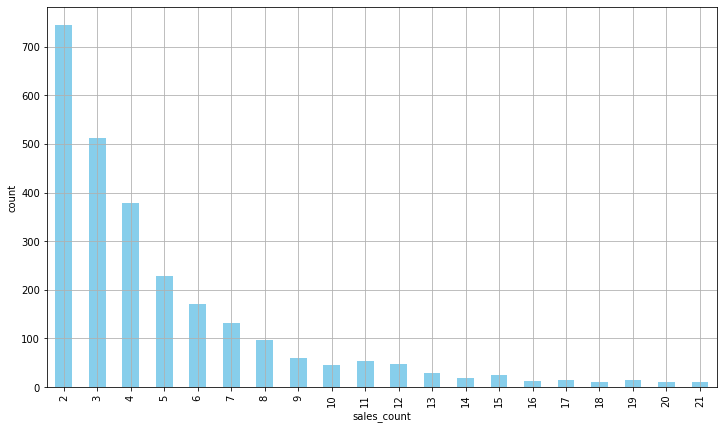

In [ ]:
ax = summary_df.groupby('sales_count').count()['sales_avg'][:20].plot(
    kind='bar',
    color='skyblue',
    figsize=(12,7),
    grid=True
)

ax.set_ylabel('count')

plt.show()

In [ ]:
summary_df['sales_count'].describe()

count    2692.000000
mean        5.971025
std         8.878128
min         2.000000
25%         2.000000
50%         4.000000
75%         6.000000
max       201.000000
Name: sales_count, dtype: float64

In [ ]:
summary_df['sales_avg'].describe()

count     2692.000000
mean       391.458687
std        465.584404
min          3.450000
25%        197.661000
50%        306.043333
75%        444.524000
max      14844.766667
Name: sales_avg, dtype: float64

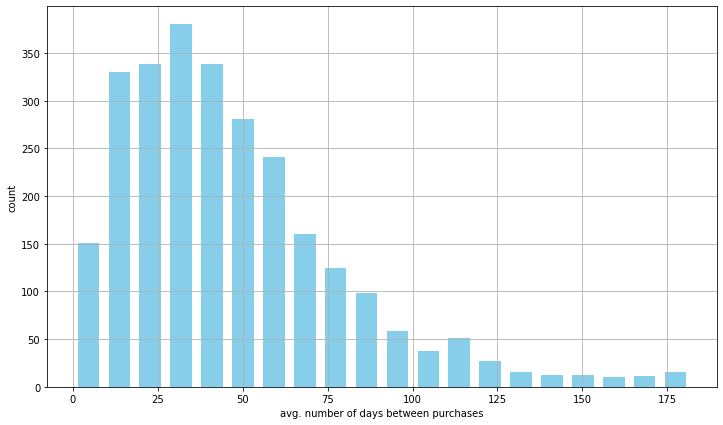

In [ ]:
ax = summary_df['invoicedate_purchase_frequency'].hist(
    bins=20,
    color='skyblue',
    rwidth=0.7,
    figsize=(12,7)
)

ax.set_xlabel('avg. number of days between purchases')
ax.set_ylabel('count')

plt.show()

In [ ]:
summary_df['invoicedate_purchase_frequency'].describe()

count    2692.000000
mean       46.999022
std        32.395004
min         0.029412
25%        23.500000
50%        40.500000
75%        62.333333
max       182.000000
Name: invoicedate_purchase_frequency, dtype: float64

In [ ]:
summary_df['invoicedate_purchase_duration'].describe()

count    2692.000000
mean      199.720282
std       107.816559
min         1.000000
25%       107.000000
50%       209.000000
75%       296.000000
max       364.000000
Name: invoicedate_purchase_duration, dtype: float64

# 4. Predicting 3-Month CLV(Customer Lifetime Value)

#### 4.1. Data Preparation

In [ ]:
clv_freq = '3M'

In [ ]:
data_df = orders_df.reset_index().groupby([
    'CustomerID',
    pd.Grouper(key='InvoiceDate', freq=clv_freq)
]).agg({
    'Sales': [sum, groupby_mean, groupby_count],
})

reset_index메서드는 설정 인덱스를 제거하고 기본 인덱스(0,1,2, ... , n)으로 변경하는 메서드 입니다.

In [ ]:
data_df

Sales                    
                             sum           avg count
CustomerID InvoiceDate                              
12346.0    2011-03-31   77183.60  77183.600000     1
12347.0    2010-12-31     711.79    711.790000     1
           2011-03-31     475.39    475.390000     1
           2011-06-30    1018.77    509.385000     2
           2011-09-30     584.91    584.910000     1
...                          ...           ...   ...
18283.0    2011-06-30     524.68    131.170000     4
           2011-09-30     278.09     92.696667     3
           2011-12-31     766.21    153.242000     5
18287.0    2011-06-30     765.28    765.280000     1
           2011-12-31    1072.00    536.000000     2

[9220 rows x 3 columns]

In [ ]:
data_df.columns = ['_'.join(col).lower() for col in data_df.columns]

In [ ]:
data_df = data_df.reset_index()

In [ ]:
data_df.head(10)

,CustomerID,InvoiceDate,sales_sum,sales_avg,sales_count
0,12346.0,2011-03-31,77183.60,77183.600,1
1,12347.0,2010-12-31,711.79,711.790,1
2,12347.0,2011-03-31,475.39,475.390,1
3,12347.0,2011-06-30,1018.77,509.385,2
4,12347.0,2011-09-30,584.91,584.910,1
5,12347.0,2011-12-31,1294.32,1294.320,1
6,12348.0,2010-12-31,892.80,892.800,1
7,12348.0,2011-03-31,227.44,227.440,1
8,12348.0,2011-06-30,367.00,367.000,1
9,12348.0,2011-09-30,310.00,310.000,1


In [ ]:
data_df.head()

,CustomerID,InvoiceDate,sales_sum,sales_avg,sales_count
0,12346.0,2011-03-31,77183.60,77183.600,1
1,12347.0,2010-12-31,711.79,711.790,1
2,12347.0,2011-03-31,475.39,475.390,1
3,12347.0,2011-06-30,1018.77,509.385,2
4,12347.0,2011-09-30,584.91,584.910,1


In [ ]:
data_df.reset_index()

,index,CustomerID,InvoiceDate,sales_sum,sales_avg,sales_count
0,0,12346.0,2011-03-31,77183.60,77183.600000,1
1,1,12347.0,2010-12-31,711.79,711.790000,1
2,2,12347.0,2011-03-31,475.39,475.390000,1
3,3,12347.0,2011-06-30,1018.77,509.385000,2
4,4,12347.0,2011-09-30,584.91,584.910000,1
...,...,...,...,...,...,...
9215,9215,18283.0,2011-06-30,524.68,131.170000,4
9216,9216,18283.0,2011-09-30,278.09,92.696667,3
9217,9217,18283.0,2011-12-31,766.21,153.242000,5
9218,9218,18287.0,2011-06-30,765.28,765.280000,1


In [ ]:
date_month_map = {
    str(x)[:10]: 'M_%s' % (i+1) for i, x in enumerate(
        sorted(data_df.reset_index()['InvoiceDate'].unique(), reverse=True)
    )
}

- sorted(data_df.reset_index()['InvoiceDate'].unique() => 고유한 InvoiceDate를 내림차순으로 정렬

- for i, x in enumerate() => i는 순번(0, 1, 2...), x에 InvoiceDate

- str(x)[:10]: 'M_%s' % (i+1) => 날짜타입인 x를 String으로 변환, 이를 'M_순번' 형태로 딕셔너리 저장

In [ ]:
sorted(data_df.reset_index()['InvoiceDate'].unique())

[numpy.datetime64('2010-12-31T00:00:00.000000000'),
 numpy.datetime64('2011-03-31T00:00:00.000000000'),
 numpy.datetime64('2011-06-30T00:00:00.000000000'),
 numpy.datetime64('2011-09-30T00:00:00.000000000'),
 numpy.datetime64('2011-12-31T00:00:00.000000000')]

In [ ]:
date_month_map

{'2011-12-31': 'M_1',
 '2011-09-30': 'M_2',
 '2011-06-30': 'M_3',
 '2011-03-31': 'M_4',
 '2010-12-31': 'M_5'}

In [ ]:
data_df.head(10)

,CustomerID,InvoiceDate,sales_sum,sales_avg,sales_count
0,12346.0,2011-03-31,77183.60,77183.600,1
1,12347.0,2010-12-31,711.79,711.790,1
2,12347.0,2011-03-31,475.39,475.390,1
3,12347.0,2011-06-30,1018.77,509.385,2
4,12347.0,2011-09-30,584.91,584.910,1
5,12347.0,2011-12-31,1294.32,1294.320,1
6,12348.0,2010-12-31,892.80,892.800,1
7,12348.0,2011-03-31,227.44,227.440,1
8,12348.0,2011-06-30,367.00,367.000,1
9,12348.0,2011-09-30,310.00,310.000,1


In [ ]:
data_df['M'] = data_df['InvoiceDate'].apply(lambda x: date_month_map[str(x)[:10]])

In [ ]:
data_df.head()

,CustomerID,InvoiceDate,sales_sum,sales_avg,sales_count,M
0,12346.0,2011-03-31,77183.60,77183.600,1,M_4
1,12347.0,2010-12-31,711.79,711.790,1,M_5
2,12347.0,2011-03-31,475.39,475.390,1,M_4
3,12347.0,2011-06-30,1018.77,509.385,2,M_3
4,12347.0,2011-09-30,584.91,584.910,1,M_2


#### - Building Sample Set

In [ ]:
features_df = pd.pivot_table(
    data_df.loc[data_df['M'] != 'M_1'],
    values=['sales_sum', 'sales_avg', 'sales_count'],
    columns='M',
    index='CustomerID'
)

In [ ]:
features_df

sales_avg                                sales_count            \
M                  M_2      M_3           M_4     M_5         M_2  M_3  M_4   
CustomerID                                                                    
12346.0            NaN      NaN  77183.600000     NaN         NaN  NaN  1.0   
12347.0     584.910000  509.385    475.390000  711.79         1.0  2.0  1.0   
12348.0     310.000000  367.000    227.440000  892.80         1.0  1.0  1.0   
12350.0            NaN      NaN    334.400000     NaN         NaN  NaN  1.0   
12352.0     316.250000      NaN    312.362000     NaN         2.0  NaN  5.0   
...                ...      ...           ...     ...         ...  ...  ...   
18280.0            NaN      NaN    180.600000     NaN         NaN  NaN  1.0   
18281.0            NaN   80.820           NaN     NaN         NaN  1.0  NaN   
18282.0     100.210000      NaN           NaN     NaN         1.0  NaN  NaN   
18283.0      92.696667  131.170    105.966667     NaN         3.0  4.0  3.0   
18287.0            NaN  765.280           NaN     NaN         NaN  1.0  NaN   

                sales_sum                             
M           M_5       M_2      M_3       M_4     M_5  
CustomerID                                            
12346.0     NaN       NaN      NaN  77183.60     NaN  
12347.0     1.0    584.91  1018.77    475.39  711.79  
12348.0     1.0    310.00   367.00    227.44  892.80  
12350.0     NaN       NaN      NaN    334.40     NaN  
12352.0     NaN    632.50      NaN   1561.81     NaN  
...         ...       ...      ...       ...     ...  
18280.0     NaN       NaN      NaN    180.60     NaN  
18281.0     NaN       NaN    80.82       NaN     NaN  
18282.0     NaN    100.21      NaN       NaN     NaN  
18283.0     NaN    278.09   524.68    317.90     NaN  
18287.0     NaN       NaN   765.28       NaN     NaN  

[3616 rows x 12 columns]

In [ ]:
features_df.columns

MultiIndex([(  'sales_avg', 'M_2'),
            (  'sales_avg', 'M_3'),
            (  'sales_avg', 'M_4'),
            (  'sales_avg', 'M_5'),
            ('sales_count', 'M_2'),
            ('sales_count', 'M_3'),
            ('sales_count', 'M_4'),
            ('sales_count', 'M_5'),
            (  'sales_sum', 'M_2'),
            (  'sales_sum', 'M_3'),
            (  'sales_sum', 'M_4'),
            (  'sales_sum', 'M_5')],
           names=[None, 'M'])

In [ ]:
features_df.columns = ['_'.join(col) for col in features_df.columns]

In [ ]:
features_df.shape

(3616, 12)

In [ ]:
features_df.head(10)

,sales_avg_M_2,sales_avg_M_3,sales_avg_M_4,sales_avg_M_5,sales_count_M_2,sales_count_M_3,sales_count_M_4,sales_count_M_5,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4,sales_sum_M_5
CustomerID,,,,,,,,,,,,
12346.0,NaN,NaN,77183.600,NaN,NaN,NaN,1.0,NaN,NaN,NaN,77183.60,NaN
12347.0,584.91,509.385,475.390,711.79,1.0,2.0,1.0,1.0,584.91,1018.77,475.39,711.79
12348.0,310.00,367.000,227.440,892.80,1.0,1.0,1.0,1.0,310.00,367.00,227.44,892.80
12350.0,NaN,NaN,334.400,NaN,NaN,NaN,1.0,NaN,NaN,NaN,334.40,NaN
12352.0,316.25,NaN,312.362,NaN,2.0,NaN,5.0,NaN,632.50,NaN,1561.81,NaN
12353.0,NaN,89.000,NaN,NaN,NaN,1.0,NaN,NaN,NaN,89.00,NaN,NaN
12354.0,NaN,1079.400,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1079.40,NaN,NaN
12355.0,NaN,459.400,NaN,NaN,NaN,1.0,NaN,NaN,NaN,459.40,NaN,NaN
12356.0,NaN,481.460,2271.620,NaN,NaN,1.0,1.0,NaN,NaN,481.46,2271.62,NaN


In [ ]:
features_df = features_df.fillna(0)

In [ ]:
features_df.head()

,sales_avg_M_2,sales_avg_M_3,sales_avg_M_4,sales_avg_M_5,sales_count_M_2,sales_count_M_3,sales_count_M_4,sales_count_M_5,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4,sales_sum_M_5
CustomerID,,,,,,,,,,,,
12346.0,0.00,0.000,77183.600,0.00,0.0,0.0,1.0,0.0,0.00,0.00,77183.60,0.00
12347.0,584.91,509.385,475.390,711.79,1.0,2.0,1.0,1.0,584.91,1018.77,475.39,711.79
12348.0,310.00,367.000,227.440,892.80,1.0,1.0,1.0,1.0,310.00,367.00,227.44,892.80
12350.0,0.00,0.000,334.400,0.00,0.0,0.0,1.0,0.0,0.00,0.00,334.40,0.00
12352.0,316.25,0.000,312.362,0.00,2.0,0.0,5.0,0.0,632.50,0.00,1561.81,0.00


In [ ]:
response_df = data_df.loc[data_df['M'] == 'M_1', ['CustomerID', 'sales_sum']]

In [ ]:
response_df

,CustomerID,sales_sum
5,12347.0,1294.32
10,12349.0,1757.55
14,12352.0,311.73
20,12356.0,58.35
21,12357.0,6207.67
...,...,...
9207,18274.0,175.92
9208,18276.0,335.86
9209,18277.0,110.38
9217,18283.0,766.21


In [ ]:
response_df.columns = ['CustomerID', 'CLV'+clv_freq]

In [ ]:
response_df.shape

(2407, 2)

In [ ]:
response_df.head(10)

,CustomerID,CLV3M
5,12347.0,1294.32
10,12349.0,1757.55
14,12352.0,311.73
20,12356.0,58.35
21,12357.0,6207.67
25,12359.0,2876.85
28,12360.0,1043.78
33,12362.0,2119.85
37,12364.0,299.06
41,12370.0,739.28


In [ ]:
sample_set_df = features_df.merge(
    response_df,
    left_index=True,
    right_on='CustomerID',
    how='left'
)

In [ ]:
sample_set_df.shape

(3616, 14)

In [ ]:
sample_set_df.head(10)

,sales_avg_M_2,sales_avg_M_3,sales_avg_M_4,sales_avg_M_5,sales_count_M_2,sales_count_M_3,sales_count_M_4,sales_count_M_5,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4,sales_sum_M_5,CustomerID,CLV3M
NaN,0.00,0.000,77183.600,0.00,0.0,0.0,1.0,0.0,0.00,0.00,77183.60,0.00,12346.0,NaN
5.0,584.91,509.385,475.390,711.79,1.0,2.0,1.0,1.0,584.91,1018.77,475.39,711.79,12347.0,1294.32
NaN,310.00,367.000,227.440,892.80,1.0,1.0,1.0,1.0,310.00,367.00,227.44,892.80,12348.0,NaN
NaN,0.00,0.000,334.400,0.00,0.0,0.0,1.0,0.0,0.00,0.00,334.40,0.00,12350.0,NaN
14.0,316.25,0.000,312.362,0.00,2.0,0.0,5.0,0.0,632.50,0.00,1561.81,0.00,12352.0,311.73
NaN,0.00,89.000,0.000,0.00,0.0,1.0,0.0,0.0,0.00,89.00,0.00,0.00,12353.0,NaN
NaN,0.00,1079.400,0.000,0.00,0.0,1.0,0.0,0.0,0.00,1079.40,0.00,0.00,12354.0,NaN
NaN,0.00,459.400,0.000,0.00,0.0,1.0,0.0,0.0,0.00,459.40,0.00,0.00,12355.0,NaN
20.0,0.00,481.460,2271.620,0.00,0.0,1.0,1.0,0.0,0.00,481.46,2271.62,0.00,12356.0,58.35
NaN,484.86,0.000,0.000,0.00,1.0,0.0,0.0,0.0,484.86,0.00,0.00,0.00,12358.0,NaN


In [ ]:
sample_set_df = sample_set_df.fillna(0)

In [ ]:
sample_set_df.head()

,sales_avg_M_2,sales_avg_M_3,sales_avg_M_4,sales_avg_M_5,sales_count_M_2,sales_count_M_3,sales_count_M_4,sales_count_M_5,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4,sales_sum_M_5,CustomerID,CLV3M
NaN,0.00,0.000,77183.600,0.00,0.0,0.0,1.0,0.0,0.00,0.00,77183.60,0.00,12346.0,0.00
5.0,584.91,509.385,475.390,711.79,1.0,2.0,1.0,1.0,584.91,1018.77,475.39,711.79,12347.0,1294.32
NaN,310.00,367.000,227.440,892.80,1.0,1.0,1.0,1.0,310.00,367.00,227.44,892.80,12348.0,0.00
NaN,0.00,0.000,334.400,0.00,0.0,0.0,1.0,0.0,0.00,0.00,334.40,0.00,12350.0,0.00
14.0,316.25,0.000,312.362,0.00,2.0,0.0,5.0,0.0,632.50,0.00,1561.81,0.00,12352.0,311.73


In [ ]:
sample_set_df['CLV3M'].describe()

count     3616.000000
mean       511.558520
std       2371.743293
min          0.000000
25%          0.000000
50%          0.000000
75%        458.662500
max      68012.350000
Name: CLV3M, dtype: float64

#### 4.2. Regression Models

***
R-Squared
0부터 1사이 숫자로, 1에 가까울수록 모델이 정확하게 훈련되었고, 0에 가까울수록 정확도가 낮다.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
target_var = 'CLV'+clv_freq
all_features = [x for x in sample_set_df.columns if x not in['CustomerID', target_var]]

In [ ]:
all_features

['sales_avg_M_2',
 'sales_avg_M_3',
 'sales_avg_M_4',
 'sales_avg_M_5',
 'sales_count_M_2',
 'sales_count_M_3',
 'sales_count_M_4',
 'sales_count_M_5',
 'sales_sum_M_2',
 'sales_sum_M_3',
 'sales_sum_M_4',
 'sales_sum_M_5']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    sample_set_df[all_features],
    sample_set_df[target_var],
    test_size=0.3
)

#### - Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression

# Try these models as well
# from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor


In [ ]:
reg_fit = LinearRegression()

In [ ]:
reg_fit.fit(x_train, y_train)

LinearRegression()

In [ ]:
reg_fit.intercept_

-15.738698401018326

In [ ]:
coef = pd.DataFrame(list(zip(all_features, reg_fit.coef_)))
coef.columns = ['feature', 'coef']

coef

,feature,coef
0,sales_avg_M_2,-0.356415
1,sales_avg_M_3,0.133190
2,sales_avg_M_4,0.421957
3,sales_avg_M_5,-0.318753
4,sales_count_M_2,22.278876
5,sales_count_M_3,49.381654
6,sales_count_M_4,110.504410
7,sales_count_M_5,-90.771223
8,sales_sum_M_2,0.656830
9,sales_sum_M_3,0.003401


#### Ramdom Forest Regressor

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [ ]:
# GridSearch를 이용한 최적화
params = {
    'n_estimators':(100, 200),
    'max_depth' : (5, 8),
    'min_samples_leaf' : (8, 18),
    'min_samples_split' : (8, 16)
}
rf_run = RandomForestRegressor(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_run, param_grid=params, cv=5, n_jobs=-1)
grid_cv.fit(x_train, y_train)

print('최적 하이퍼 파라미터:', grid_cv.best_params_)
print('최적 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_leaf': 8, 'min_samples_split': 16, 'n_estimators': 200}
최적 예측 정확도: 0.4761


위코드의결과에따라아래코드의hyperparameter 수치를조정한다음코드를실행합니다

In [ ]:
rf_run = RandomForestRegressor (random_state=0, max_depth=5, min_samples_leaf=8, min_samples_split=8,n_estimators=100)
rf_fit = rf_run.fit(x_train, y_train)

Grid Search

Grid search is a process that searches exhaustively through a manually specified subset of the hyperparameter space of the targeted algorithm. Random search, on the other hand, selects a value for each hyperparameter independently using a probability distribution. 

https://huidea.tistorv.com/32

Cross Validation

Cross-validation is a technique in which we train our model using the subset of the data-set and then evaluate using the complementary subset of the data-set. The three steps involved in cross-validation are as follows
1. Reserve some portion of sample data-set.
2. Using the rest data-set train the model.
3. Test the model using the reserve portion of the data-set.

https://techblog-history-younghunjo1.tistory.com/100

#### 4.3. Evaluation

#### Evaluation metrics & Model Selection in Linear Regression

1 Mean Squared Error (MSE)
2. Mean Absolute Error (MAE)
3. R-squared or Coefficient of Determination 4. Root Mean Squared Error (RMSE)

https://towardsdatascience.com/evaluation-metrics-model-selection-in-linear-regression-73c7573208be


In [ ]:
from sklearn.metrics import r2_score, median_absolute_error 
import math

In [ ]:
train_preds = reg_fit.predict(x_train)
test_preds = reg_fit.predict(x_test)

In [ ]:
train_preds2 = rf_fit.predict(x_train)
test_preds2 = rf_fit.predict(x_test)

#### - R-Squared

In [ ]:
print('In-Sample R-Squared: %0.4f' % r2_score (y_true=y_train, y_pred=train_preds))
print('Out-of-Sample R-Squared: %0.4f' % r2_score (y_true=y_test, y_pred=test_preds))

In-Sample R-Squared: 0.7059
Out-of-Sample R-Squared: 0.4956


In [ ]:
print('RF: In-Sample R-Squared: %0.4f' % r2_score (y_true=y_train, y_pred=train_preds2))
print('RF: Out-of-Sample R-Squared: %0.4f' % r2_score (y_true=y_test, y_pred=test_preds2))

RF: In-Sample R-Squared: 0.5453
RF: Out-of-Sample R-Squared: 0.5507


#### - Median Absolute Error

In [ ]:
print('In-Sample MSE: %0.4f' % median_absolute_error(y_true=y_train, y_pred=train_preds))
print('Out-of-Sample MSE: %0.4f' % median_absolute_error(y_true=y_test, y_pred=test_preds))

In-Sample MSE: 169.0622
Out-of-Sample MSE: 179.1731


In [ ]:
print('RF: In-Sample MSE: %0.4f' % median_absolute_error(y_true=y_train, y_pred=train_preds2))
print('RF: Out-of-Sample MSE: %0.4f' % median_absolute_error(y_true=y_test, y_pred=test_preds2))

RF: In-Sample MSE: 163.9944
RF: Out-of-Sample MSE: 163.6187


#### - Root Mean Squared Error

In [ ]:
print('RF: In-Sample RMSE: %0.4f' % math.sqrt(mean_squared_error(train_preds, y_train)))
print('RF: Out-Sample RMSE: %0.4f' % math.sqrt(mean_squared_error(test_preds, y_test)))

RF: In-Sample RMSE: 1206.7218
RF: Out-Sample RMSE: 1904.2918


In [ ]:
print('RF: In-Sample RMSE: %0.4f' % math.sqrt(mean_squared_error(train_preds2, y_train)))
print('RF: Out-Sample RMSE: %0.4f' % math.sqrt(mean_squared_error(test_preds2, y_test)))

RF: In-Sample RMSE: 1500.5001
RF: Out-Sample RMSE: 1797.3551


#### - Scatter Plot

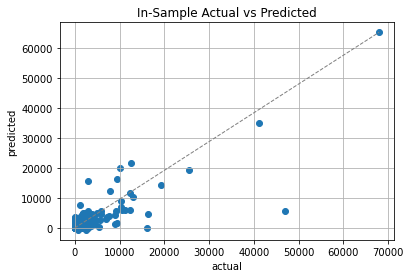

In [ ]:
plt.scatter(y_train, train_preds)
plt.plot([0, max(y_train)], [0, max(train_preds)], color='gray', lw=1, linestyle='--')

plt.xlabel('actual')
plt.ylabel('predicted')
plt.title('In-Sample Actual vs Predicted')
plt.grid()

plt.show()

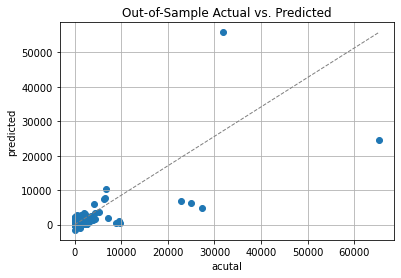

In [ ]:
plt.scatter(y_test, test_preds)
plt.plot([0, max(y_test)], [0, max(test_preds)], color='gray', lw=1, linestyle='--')

plt.xlabel('acutal')
plt.ylabel('predicted')
plt.title('Out-of-Sample Actual vs. Predicted')
plt.grid()

plt.show()

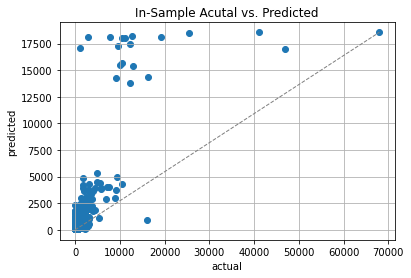

In [ ]:
plt.scatter(y_train, train_preds2)
plt.plot([0, max(y_train)], [0, max(train_preds2)], color='gray', lw=1, linestyle='--')

plt.xlabel('actual')
plt.ylabel('predicted')
plt.title('In-Sample Acutal vs. Predicted')
plt.grid()

plt.show()

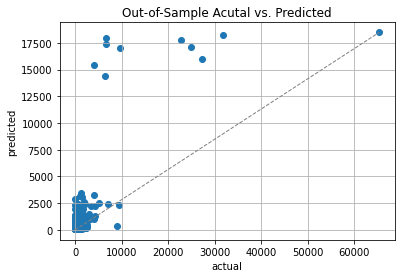

In [ ]:
plt.scatter(y_test, test_preds2)
plt.plot([0, max(y_test)], [0, max(test_preds2)], color='gray', lw=1, linestyle='--')

plt.xlabel('actual')
plt.ylabel('predicted')
plt.title('Out-of-Sample Acutal vs. Predicted')
plt.grid()

plt.show()

#### Feature Importance

In [ ]:
import seaborn as sns
%matplotlib inline

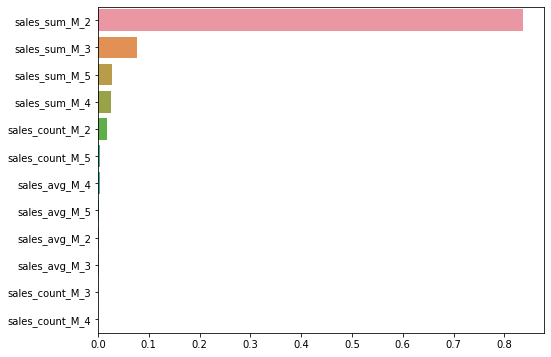

In [ ]:
feature_importances_values = rf_fit.feature_importances_
feature_importances = pd.Series(feature_importances_values, index=x_train.columns)
feature_top = feature_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
sns.barplot(x=feature_top, y=feature_top.index)
plt.show()